# Multicalss. Creating the dataset

După cum am învățat în cadrul acestei secțiuni, există două tipuri de clasficare, clasificare binară și multiclasificare. Până acuma am creat un model care să ne rezolve problema de calsificare binară prin care să ne spună dacă un anumit element aparșine dintr-o clasă sau din alta. De multe ori însă în viața reală există mai multe clase în care trebuie împărțite un anumit set de date. Atunci când creem un model de Deep Learning pentru clasificare binară sau pentru multiclasificare o să existe anumite diferențe în modul în care creem acele modele, din acest motiv trebuie să ne uităm și la cum se creează un model de multiclasificare. Pentru început însă o să ne creem setul de date

Pentru a ne crea un set de date potrivit o să ne folosim de metoda `make_blobls` din `sklearn.datasets`. Cu ajutorul acestei metode putem să ne creem un set de date cu un anumit număr de clase. Pentru acest proiect o să ne creem un număr de 4 clase și un număr de 5000 de samples care face parte din acest set de date.

In [1]:
# importing the libraries
import torch
from torch import nn

import pandas as pd
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [2]:
# create the dataset
# Create the constants
NUM_SAMPLES = 5000
NUM_FEATURES = 2
NUM_CLASSES = 4
RANDOM_SEED = 42

X, y = make_blobs(n_samples=NUM_SAMPLES, n_features=NUM_FEATURES, centers=NUM_CLASSES, cluster_std=1.5, random_state=RANDOM_SEED)

In [3]:
# put the data into a DataFrame
df = pd.DataFrame({
    "X1": X[:, 0],
    "X2": X[:, 1],
    "labels": y
})

df.head()

X1        X2  labels
0  3.161173  1.546937       1
1 -8.742997 -8.568490       2
2  3.368428  0.995036       1
3 -8.534404 -5.649279       2
4 -9.532127  7.905043       3

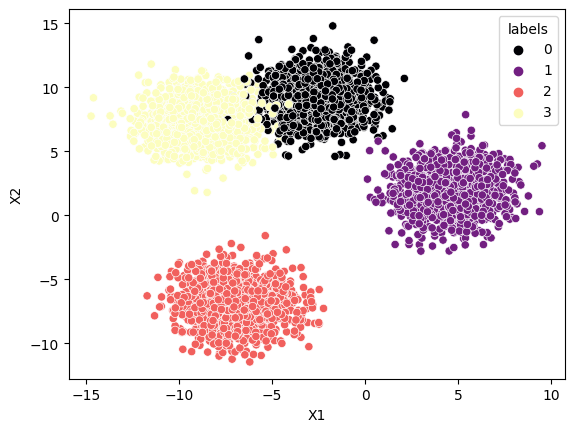

In [15]:
sns.scatterplot(data=df, x="X1", y="X2", hue="labels", palette="magma");

Din setul de date pe care l-am creat mai sus observăm faptul că avem 4 clase distinse. Ceea ce trebuie să facem este să creem un model prin care am putea să separăm aceste clase cât mai bine. Să facem acest lucru perfect nu prea este posibil deoarece putem să vedem că există o suprapunere între clase. În acele locuri, modelul o să mai facă anumite erori, ceea ce este de așteptat. În continuare o să ne transformăm setul de date în tensori și o să împărțim aceste date în set de date de antrenare și de testare

In [16]:
# transform the data into tensors
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [17]:
X.dtype

torch.float32

In [18]:
# splitting the data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

## Recapitulare

În cadrul acestei lecții am învățat următoarele:

1. De ce metodă putem să ne folosim pentru a ne crea un set de date potrivit pentru o problemă de multiclasificare
```python
from sklearn.datasets import make_blobs

```

2. De ce parametrii are nevoie metoda respectivă pentru a ne crea un set de date potrivit

    - n_samples = numărul de date din acest set

    - n_features = numărul de features pentru fiecare elemnent din setul de date

    - centers = numărul de clase

    - cluster_std = deviația standard pentru clase ca să facem un set de date ce are valori apropiate sau chiar suprapuse

    - random_seed = rădăcina algoritmului pentru a putea replica datele